<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/sacarsmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files

# Install Kaggle library
!pip install -q kaggle
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


Upload training data

In [0]:
import pandas as pd
import io
data = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines=True) #data is trainset

In [0]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Upload testingdata

In [3]:
uploaded=files.upload()

Saving Sarcasm_Headlines_Dataset_v2.json to Sarcasm_Headlines_Dataset_v2.json


In [0]:
df = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset_v2.json']), lines=True) #testset

In [30]:
print(data.shape)
df_split= df.iloc[0:round(len(df['headline'])*0.6)]
print(df_split.shape)
data=pd.concat([data,df_split],ignore_index=True)

(95393, 3)
(17171, 3)


In [0]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cross_validation import train_test_split  #split train data 80%
def vectorization_sk_tfidf(x):                          #vectorization and tfidf function
  vectorizer = CountVectorizer()
  y = vectorizer.fit_transform(x)
  transformer = TfidfTransformer()
  tfidf = transformer.fit_transform(y).toarray()
  return tfidf
vec_tfidf=vectorization_sk_tfidf(data['headline'].str.replace('\d+', ''))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


NAIVE BAYES


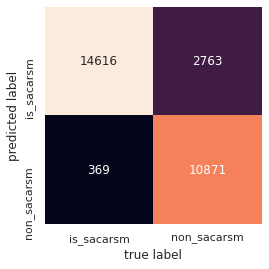

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
target_name=['is_sacarsm','non_sacarsm']
model = MultinomialNB().fit(vec_tfidf,data['is_sarcastic'])
model=make_pipeline( CountVectorizer(),TfidfTransformer(), MultinomialNB())
model.fit(data['headline'],data['is_sarcastic'])
y_model=model.predict(df['headline'])
mat = confusion_matrix(df['is_sarcastic'], y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(accuracy_score(df['is_sarcastic'],y_model)) #performance


0.9239582163315736 0.8905622139138335


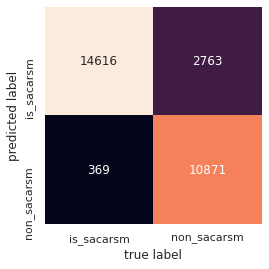

In [17]:
y2_model = model.fit(data['headline'],data['is_sarcastic']).predict(df['headline'])
y1_model = model.fit(df['headline'],df['is_sarcastic']).predict(data['headline'])
print(accuracy_score(data['is_sarcastic'],y1_model),accuracy_score(df['is_sarcastic'],y2_model))
def predict_category(s,train=data,model=model):
   pred = model.predict(s)
   if (pred==1): print("is_sacarsm")
   else: print("non_sarcasm")
#predict_category(["‘It Was, For, Uh, Medical Reasons,’ Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut"])